In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom,bernoulli,norm

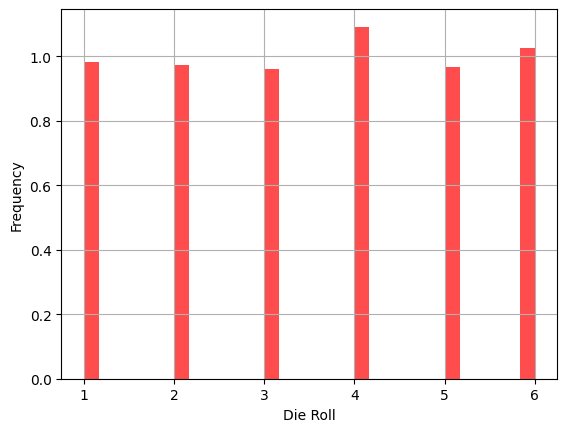

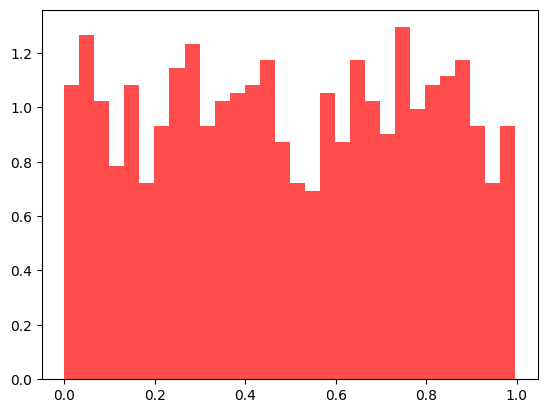

In [ ]:

# Uniform Distribution
n_trials=1000
die_rolls=np.random.randint(1,7,n_trials)
prob_of_2=np.sum(die_rolls==2)/n_trials
plt.hist(die_rolls,bins=30,density=True,color='red',alpha=0.7)
plt.xlabel('Die Roll')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

prob=np.random.uniform(0,1,1000)
plt.hist(prob,bins=30,density=True,color='red',alpha=0.7)
plt.show()



/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6790: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


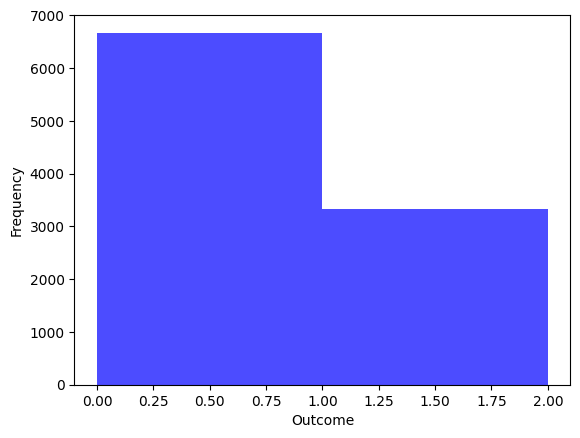

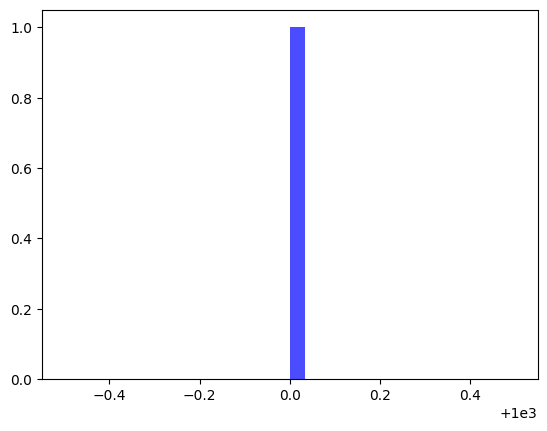

In [ ]:
# Bernoulli Distribution
n_trials=10000
die_rolls=np.random.randint(1,7,n_trials)
bernoulli_dist=(die_rolls==1)|(die_rolls==2)
prob=np.sum(bernoulli_dist)/n_trials
plt.hist(bernoulli_dist,bins=[0,1,2],alpha=0.7,color='blue')
plt.xlabel('Outcome')
plt.ylabel('Frequency')

plt.show()

prob=bernoulli.rvs(0.3,1000)
plt.hist(prob,bins=30,alpha=0.7,color='blue')
plt.show()

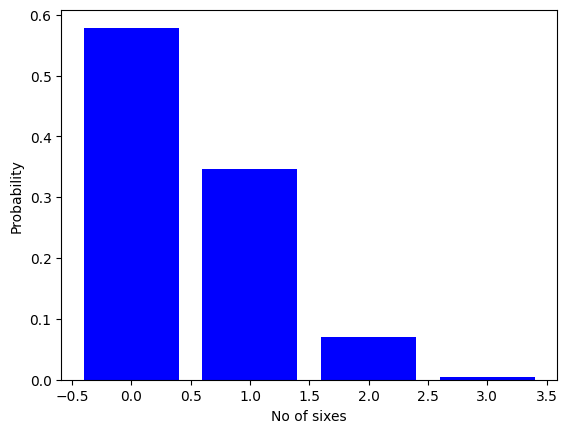

In [ ]:
# Binomial Distribution
n_tosses=3
p_success=1/6
n_trials=1000

n_successes=np.arange(0,n_tosses+1)
binom_dist=binom.pmf(n_successes,n_tosses,p_success)

simulated_prob=np.sum(np.random.randint(1,7,(n_trials,n_tosses))==6,axis=1)
simulated_prob=np.sum(simulated_prob==1)/n_trials

plt.bar(n_successes,binom_dist,color='blue')
plt.xlabel('No of sixes')
plt.ylabel('Probability')

plt.show()

binom.pmf(k,n,p)


<ipython-input-13-c27649bd0e27>:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data,shade=True,label=param['label'])
<ipython-input-13-c27649bd0e27>:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data,shade=True,label=param['label'])
<ipython-input-13-c27649bd0e27>:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data,shade=True,label=param['label'])
<ipython-input-13-c27649bd0e27>:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data,shade=True,label=param['label'])


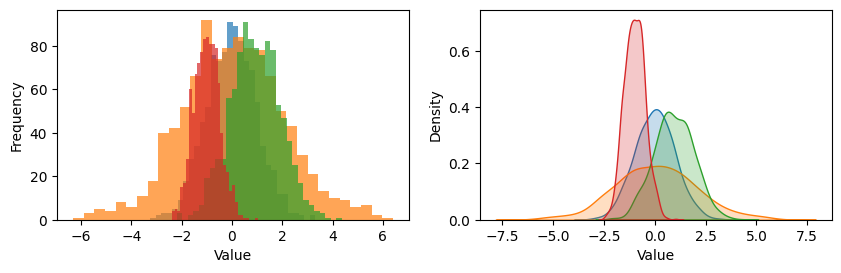

In [ ]:
# Normal Distribution
import seaborn as sns
def generate_normal_data(mean,std_dev,size):
  return np.random.normal(mean,std_dev,size)
params=[
    {'mean':0,'std_dev':1,'label':'Mean =0, std_dev=1'},
    {'mean':0,'std_dev':2,'label':'Mean =0, std_dev=2'},
    {'mean':1,'std_dev':1,'label':'Mean =1, std_dev=1'},
    {'mean':-1,'std_dev':0.5,'label':'Mean =-1, std_dev=0.5'},
]
size=1000
plt.figure(figsize=(10,6))
for param in params:
  data=generate_normal_data(param['mean'],param['std_dev'],size)
  plt.subplot(2,2,1)
  plt.hist(data,bins=30,alpha=0.7,label=param['label'])
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.legend


  plt.subplot(2,2,2)
  sns.kdeplot(data,shade=True,label=param['label'])
  plt.xlabel('Value')
  plt.ylabel('Density')
  plt.legend
plt.tight_layout
plt.show()

mean=0
std_dev=1
num_samples=100

prob=norm.rvs(size=num_samples,loc=mean,scale=std_dev)
plt.figure(figsize=(10,6))
plt.hist(prob,bins=30,alpha=0.7)
xmin,xmax=plt.xlim()
x=np.linspace(xmin,xmax,100)
p=norm.pdf(x,mean,std_dev)
plt.plot(x,p,linewidth=2)



In [ ]:
sample_space=np.arange(1,7)
event=sample_space[sample_space>3]
prob=len(event)/len(sample_space)
print(sample_space)
print(event)
print(prob)

[1 2 3 4 5 6]
[4 5 6]
0.5


In [ ]:
from scipy.stats import rv_discrete
outcomes=[1,2,3,4,5,6]
prob=[1/6,1/6,1/6,1/6,1/6,1/6]
die=rv_discrete(name='die',values=(outcomes,prob))
die.pmf(3)
print(f'{outcomes}:{prob}occurences')

[1, 2, 3, 4, 5, 6]:[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]occurences


In [ ]:
pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 3.5 MB/s eta 0:00:00


In [ ]:
from hmmlearn import hmm
import numpy as np

# Define the HMM model
model = hmm.MultinomialHMM(n_components=2)

# Define the observed sequence (temperature and humidity)
observed_sequence = np.array([0, 1, 0, 1])  # Example observation sequence

# Define the lengths of the sequences
sequence_lengths = [len(observed_sequence)]

# Train the HMM model
model.fit(observed_sequence.reshape(-1, 1), sequence_lengths)

# Predict the most likely sequence of hidden states
predicted_states = model.predict(observed_sequence.reshape(-1, 1))

# Map predicted states to actual weather conditions
weather_conditions = ['Sunny', 'Rainy']
predicted_weather = [weather_conditions[state] for state in predicted_states]

print("Predicted Weather Sequence:", predicted_weather)

https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340


Predicted Weather Sequence: ['Sunny', 'Rainy', 'Sunny', 'Rainy']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_absolute_error,mean_squared_error,r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC

df=pd.read_csv('/content/User_Data.csv')
print(df.head)
print(df.shape)
print(df.isnull().sum())
print("No of zeros in each column:",(df==0).sum())
print(df.dtypes)
#print("Missing values:",df.isnull())
#filled_df=df.fillna(df.mean())
#print(filled_df)

X=df.drop('Purchased',axis=1)
y=df['Purchased']

labelencoder=LabelEncoder()
df['Gender']=labelencoder.fit_transform(df['Gender'])
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

def custom_train_test_split(X,y,test_size=0.2,random_state=None):
  if random_state:
    np.random.seed(random_state)
  indices=np.arange(len(X))
  np.random.shuffle(indices)
  test_samples=int(len(X)*test_size)
  X_train=df.iloc[indices[:-test_samples]]
  X_test=df.iloc[indices[-test_samples:]]
  y_train=df.iloc[indices[:-test_samples]]
  y_test=df.iloc[indices[-test_samples:]]
  return X_train,X_test,y_train,y_test


categorical_features=X.select_dtypes(include=['object']).columns.tolist()
numerical_features=X.select_dtypes(include=['int64','float64']).columns.tolist()

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor=ColumnTransformer(
    transformers=[
        ('cat',categorical_transformer,categorical_features),
        ('num',numerical_transformer,numerical_features)
    ],
    remainder='passthrough'
)
X= preprocessor.fit_transform(X)
X_train,X_test,y_train,y_test=custom_train_test_split(X,y,test_size=0.2,random_state=42)

pca=PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train)
principal_df=pd.DataFrame(data=X_train_pca,columns=['PC1','PC2'])
explained_variance_ratio=pca.explained_variance_ratio_
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.show()

plt.plot(range(1,len(explained_variance_ratio)+1),explained_variance_ratio,color='blue',alpha=0.5)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by principal components')
plt.show()



In [ ]:
data = {
    'Feature1': [5.1, 4.9, 4.7, 4.6, 5.0, 6.2, 6.1, 6.4, 7.2, 7.1],
    'Feature2': [3.5, 3.0, 3.2, 3.1, 3.6, 2.9, 3.0, 2.8, 3.0, 3.1],
    'Class': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'C', 'C']
}

df = pd.DataFrame(data)

# Splitting the dataset into features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
def knn_classifier(k):
  if k>len(X_train):
    print(f'k:{k}')
    print('No. of neighbors cannot exceed the no. of features')
    return
  model=KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  correct_predictions=np.sum(y_pred==y_test)
  wrong_predictions=len(y_test)-correct_predictions
  print(f'{k},{correct_predictions},{wrong_predictions}')
  accuracy=accuracy_score(y_test,y_pred)
  print(f'Accuracy:{accuracy*100:.2f}%')
  print(classification_report(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
k_values=[1,3,5]
for k in k_values:
  knn_classifier(k)


1,2,0
Accuracy:100.00%
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         1
           C       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

[[1 0]
 [0 1]]
3,1,1
Accuracy:50.00%
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         1
           B       0.00      0.00      0.00         0
           C       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.33      0.33      0.33         2
weighted avg       0.50      0.50      0.50         2

[[1 0 0]
 [0 0 0]
 [0 1 0]]
5,0,2
Accuracy:0.00%
              precision    recall  f1-score   support

           A       0.00      0.00      0.00       1.0
           B       0.00      0.00      0.00       0.0
           C       0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

   YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0  1901  22.40  24.14  29.07  31.91  33.41  33.18  31.21  30.39  30.47  29.97   
1  1902  24.93  26.58  29.77  31.78  33.73  32.91  30.92  30.73  29.80  29.12   
2  1903  23.44  25.03  27.83  31.39  32.91  33.00  31.34  29.98  29.85  29.04   
3  1904  22.50  24.73  28.21  32.02  32.64  32.07  30.36  30.09  30.04  29.20   
4  1905  22.00  22.83  26.68  30.01  33.32  33.25  31.44  30.68  30.12  30.67   

     NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0  27.31  24.49   28.96    23.27    31.46    31.27    27.25  
1  26.31  24.04   29.22    25.75    31.76    31.09    26.49  
2  26.08  23.65   28.47    24.24    30.71    30.92    26.26  
3  26.36  23.63   28.49    23.62    30.95    30.66    26.40  
4  27.52  23.82   28.30    22.25    30.00    31.33    26.57  
0.031715351056114414
0.006062186309753115
0.9874614368442488


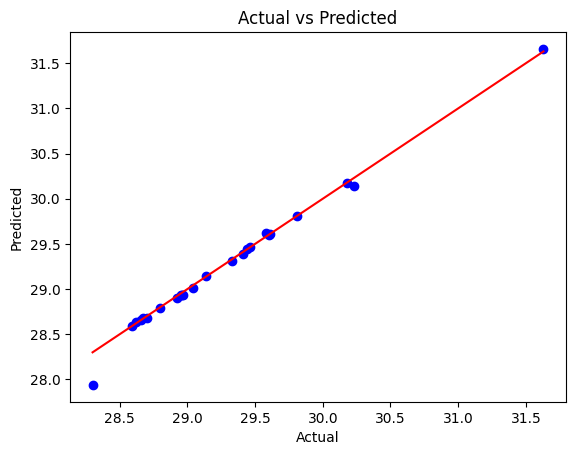

In [ ]:
# Step 1: Load the Data
data = pd.read_csv("temperatures.csv")
print(data.head())

# Step 2: Data Preprocessing
X = data.drop(columns=['YEAR', 'ANNUAL']).values  # Features
y = data['ANNUAL'].values  # Target

# Step 3: Apply Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model2=LinearRegression()
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2score=r2_score(y_test,y_pred)
print(mae)
print(mse)
print(r2score)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
# Create a custom dataset with two classes
data = {
    'Feature1': [1.2, 2.4, 3.1, 4.5, 5.2, 1.8, 2.3, 3.9, 4.1, 5.7],
    'Feature2': [0.5, 1.8, 2.6, 3.9, 4.1, 0.9, 1.3, 2.7, 3.4, 4.8],
    'Class': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]  # 0 for one class, 1 for another class
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Save DataFrame to CSV
df.to_csv("custom_dataset.csv", index=False)

# Read CSV back
df = pd.read_csv("custom_dataset.csv")

# Split dataset into features and labels
X = df[['Feature1', 'Feature2']]
y = df['Class']

svm=SVC()
params={
    'C':[0.1,1,10,100],
    'kernel':['linear','poly','rbf','sigmoid']
}
stratifiedKFold=StratifiedKFold(n_splits=3,shuffle=True,random_state=42)
gridsearch=GridSearchCV(svm,params,cv=stratifiedKFold,scoring='accuracy')
gridsearch.fit(X,y)

best_params=gridsearch.best_params_
best_svm=SVC(**best_params)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
best_svm.fit(X_train,y_train)
y_pred=best_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


# Print the evaluation metrics
print("Evaluation Metrics:")
print("Accuracy:", accuracy)


Evaluation Metrics:
Accuracy: 0.5


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X,y=make_classification(n_samples=100,n_features=20,n_classes=2,random_state=42)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

model=DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.92
